# **Einleitung**
In unserem Projekt wollen wir verschiedene Videos zu einem Bild einfrieren können. Dabei soll die Bewegung von Objekten, die im Laufe des Videos gezeigt werden, in dem Bild sichtbar sein. Dabei haben wir uns zu Beginn überlegt, welche Einschränkungen wir bezüglich der Videos festlegen und inwiefern man das Ziel am besten umsetzen könnte. Demnach haben wir nach Beispielen gesucht, die zeigen, wie wir uns unser Endprodukt vorstellen.

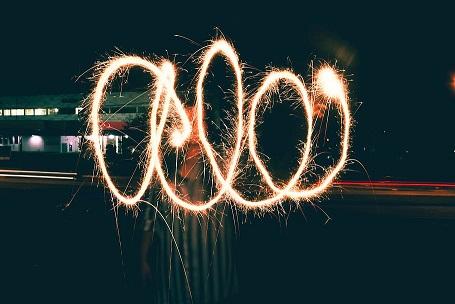

Das Zeichnen mit der Wunderkerze war ein Beispiel, an das wir direkt gedacht haben. In dem Bild ist gut zu erkennen, was unser Ziel im Laufe des Projekts ist. Hier sieht man nämlich ganz genau, wie die Person sich bewegt, bzw. was für ein Muster sie mit der Wunderkerze zieht.

# **Anfang**
Zu Beginn kommen unsere Imports, die wir im Laufe des Projekts verwendet haben.

In [83]:
#import opencv and open video stream
import urllib.request
import cv2
import numpy as np
from random import random as rand
from google.colab.patches import cv2_imshow

Als nächstes haben wir nach ein paar Videos gesucht, die wir im folgenden aufgelistet haben. Dabei ist uns aufgefallen, dass wir einige Einschränkungen festlegen sollten, um demnach nicht alle Videos zu bearbeiten. Die folgenden Videos haben wir dann als eine Video-Datei abgespeichert und diese zudem leicht austauschbar gehalten.

In [84]:
#Download video
url = 'https://previews.customer.envatousercontent.com/h264-video-previews/0888dd36-1a5b-4e5b-9fbf-e7bca069d213/16602591.mp4'
url2 = 'https://media.istockphoto.com/videos/male-dancer-in-studio-shows-ballerina-spin-video-id929138872'
url3 = 'https://media.istockphoto.com/videos/baseball-batter-hitting-ball-during-game-video-id640837234'
url4 = 'https://media.istockphoto.com/videos/modern-dancer-girl-in-white-dress-starts-dancing-contemporary-on-video-id516645076'
#url5 = Geometry
url5 = 'https://media.istockphoto.com/videos/abstract-logo-promo-pattern-of-circles-with-the-effect-of-white-video-id1220546660'
file = 'test2_video.mp4'
urllib.request.urlretrieve(url3,file)

('test2_video.mp4', <http.client.HTTPMessage at 0x7fe18c3d6450>)

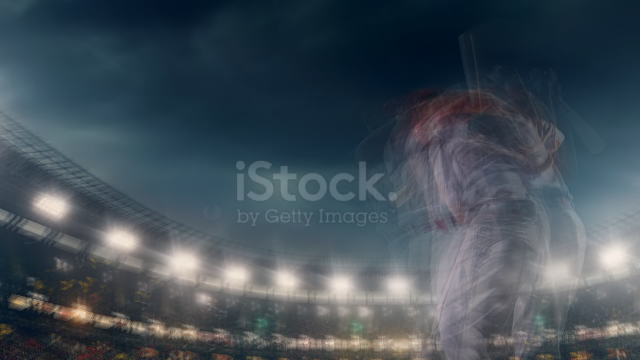

In [108]:
stream = cv2.VideoCapture(file)
_, firstframe = stream.read()
frame_count = int(stream.get(cv2.CAP_PROP_FRAME_COUNT))
images = []
#b,g,r = cv2.split(frame)
for i in range(frame_count-1):
    _, frame = stream.read()
    images.append(frame)
    if rand()*40>39:
        for j in range(10):
            images.append(frame)

avg_img = np.mean(images, axis=0)
avg_img = avg_img.astype(np.uint8)
cv2_imshow(avg_img)

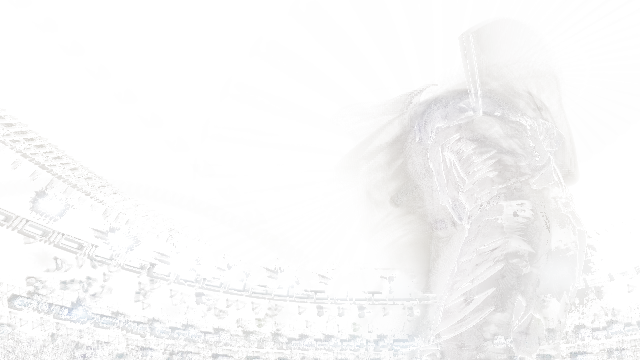

In [109]:
stream = cv2.VideoCapture(file)
_, firstframe = stream.read()
frame_count = int(stream.get(cv2.CAP_PROP_FRAME_COUNT))
images2 = []
kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE,(3,3))
fgbg = cv2.bgsegm.createBackgroundSubtractorMOG()
for i in range(frame_count-1):
    _, frame = stream.read()
    fgmask = fgbg.apply(frame)
    rgba = cv2.cvtColor(frame, cv2.COLOR_RGB2BGRA)
    rgba[:, :, 3] = fgmask
    images2.append(rgba)
    
    avg_img = np.mean(images2, axis=0)
    avg_img = avg_img.astype(np.uint8)
cv2_imshow(avg_img)

#merged_img = cv2.addWeighted(firstframe, 0.4, avg_img, 5, 0)
#cv2.imwrite('test3.png', merged_img)

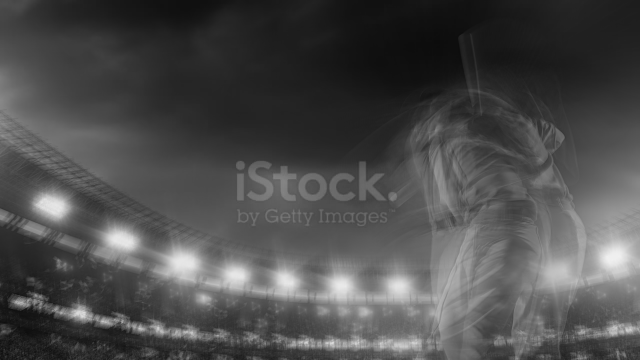

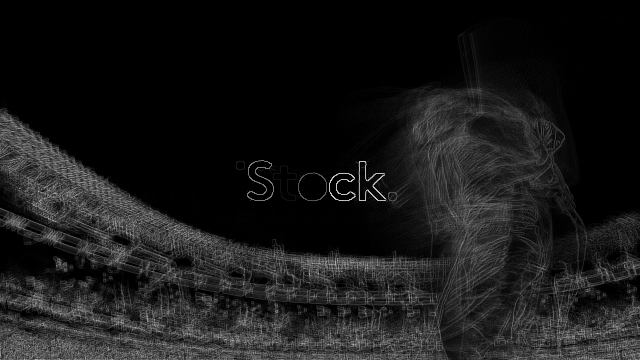

In [116]:
stream = cv2.VideoCapture(file)
_, firstframe = stream.read()
frame_count = int(stream.get(cv2.CAP_PROP_FRAME_COUNT))
images3 = []
images4 = []
frame_count = int(stream.get(cv2.CAP_PROP_FRAME_COUNT))
for i in range(frame_count-1):
    _, frame = stream.read()
    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    images3.append(gray)
    edged = cv2.Canny(gray,30,200)
    images4.append(edged)
avg_img3 = np.mean(images3, axis=0)
avg_img = avg_img.astype(np.uint8)
avg_img4 = np.mean(images4, axis=0)
cv2_imshow(avg_img3)
cv2_imshow(avg_img4)